# Reinforcement Learning - Thompson Sampling

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
from random import betavariate

N = 10000
d = 10
ads_selected = []

number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d

total_rewards = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)

        if random_beta > max_random:
            max_random = random_beta
            ad = i

    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        number_of_rewards_1[ad] += 1
    else:
        number_of_rewards_0[ad] += 1
    total_rewards += reward

## Visualizing the results

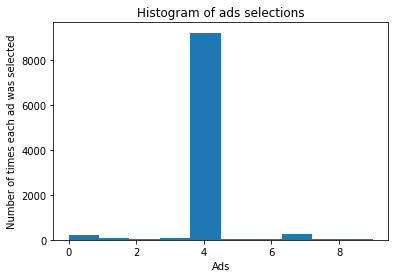

In [4]:
plt.hist(x=ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()